DataSet Source : https://www.kaggle.com/ronitf/heart-disease-uci/download

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import plotly.express as ex
sns.set_style('darkgrid')

In [105]:
heart = pd.read_csv("heart.csv")
print("shape of th dataframe  : ",heart.shape)

shape of th dataframe  :  (303, 14)


In [106]:
# renaming columns for readablity purpose
heart.columns = ['age','sex','chest_pain','person_blood_pressure','cholestrol','fasting_blood_sugar','resting_ecg','max_hrate','exang'
                ,'oldpeak','slope','ca','thal','target']
df  = heart.copy()

In [107]:
# We Don't Have any Null value's here .
heart.isnull().sum()

age                      0
sex                      0
chest_pain               0
person_blood_pressure    0
cholestrol               0
fasting_blood_sugar      0
resting_ecg              0
max_hrate                0
exang                    0
oldpeak                  0
slope                    0
ca                       0
thal                     0
target                   0
dtype: int64

In [108]:
# top 5 rows
heart.head(5)

,age,sex,chest_pain,person_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_hrate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    303 non-null    int64  
 1   sex                    303 non-null    int64  
 2   chest_pain             303 non-null    int64  
 3   person_blood_pressure  303 non-null    int64  
 4   cholestrol             303 non-null    int64  
 5   fasting_blood_sugar    303 non-null    int64  
 6   resting_ecg            303 non-null    int64  
 7   max_hrate              303 non-null    int64  
 8   exang                  303 non-null    int64  
 9   oldpeak                303 non-null    float64
 10  slope                  303 non-null    int64  
 11  ca                     303 non-null    int64  
 12  thal                   303 non-null    int64  
 13  target                 303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


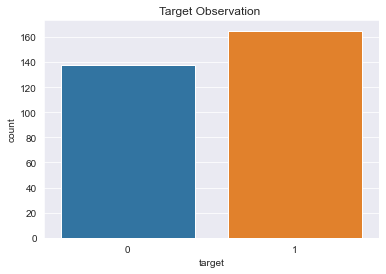

In [110]:
sns.countplot(heart['target'])
plt.title("Target Observation ")
plt.show()

In [111]:
ones  = heart[heart['target']==1] # people with heart disease
zeros = heart[heart['target']==0] # people without heart disease

Text(0.5, 0, 'Age distribution of people with heart disease ')

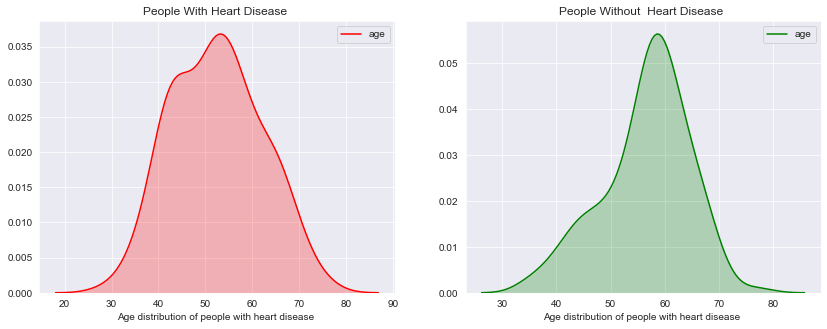

In [112]:
plt.rcParams['figure.figsize'] = (14,5)
plt.subplot(1,2,1)
sns.kdeplot(heart['age'][heart.target == 1],shade = True,color = "red")
plt.title('People With Heart Disease ')
plt.xlabel('Age distribution of people with heart disease ')
plt.subplot(1,2,2)
sns.kdeplot(heart['age'][heart.target == 0],shade = True,color = "green")
plt.title('People Without  Heart Disease ')
plt.xlabel('Age distribution of people with heart disease ')


Text(0, 0.5, 'Frequency')

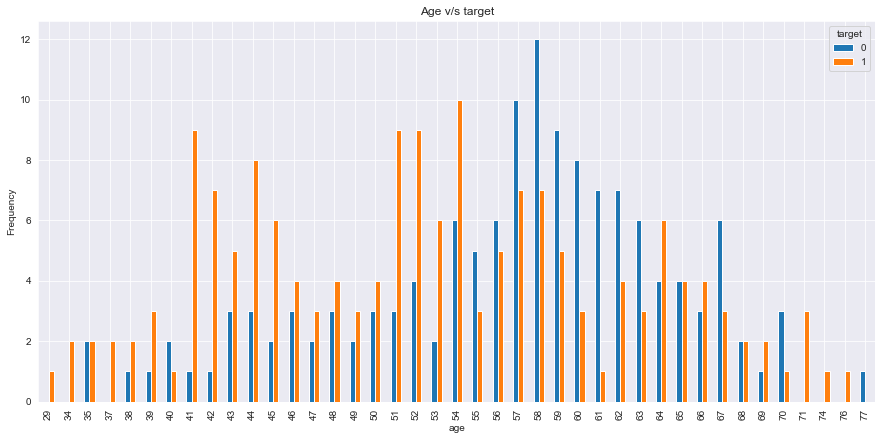

In [113]:
pd.crosstab(heart.age,heart.target).plot(kind = 'bar',figsize = (15,7))
plt.title("Age v/s target")
plt.ylabel("Frequency")

In [114]:
# sex 1 being male ,0 being female
heart['sex'][heart['sex']==1]='male'
heart['sex'][heart['sex']==0]='female'

# renaming chest pain column
heart['chest_pain'][heart['chest_pain']==0]= 'typical angina'
heart['chest_pain'][heart['chest_pain']==1]= 'atypical angina'
heart['chest_pain'][heart['chest_pain']==2]= 'non-anginal pain'
heart['chest_pain'][heart['chest_pain']==3]= 'asymptomatic'


# renaming fasting_blood_sugar 
heart["fasting_blood_sugar"][heart["fasting_blood_sugar"]==1]= 'higher than 120mg/ml'
heart["fasting_blood_sugar"][heart["fasting_blood_sugar"]==0]= 'lower than 120mg/ml'

#renaming  slope 
heart['slope'][heart['slope']==0]= 'upsloping'
heart['slope'][heart['slope']==1]= 'flat'
heart['slope'][heart['slope']==2]= 'downsloping'
heart['slope'] = heart['slope'].astype('object')

Text(0, 0.5, 'Heart Diesease frequency')

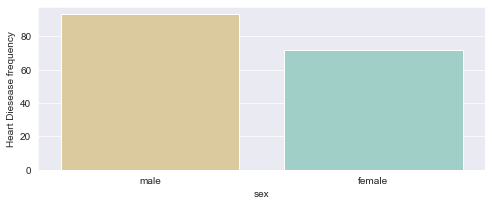

In [115]:
plt.rcParams['figure.figsize'] = (8,3)
sns.countplot(heart['sex'][heart.target == 1],palette  = 'BrBG')
plt.ylabel("Heart Diesease frequency")

#  let's visual the relationship between sex and target 

Text(0.5, 1.0, 'Gender V/S Heart Disease')

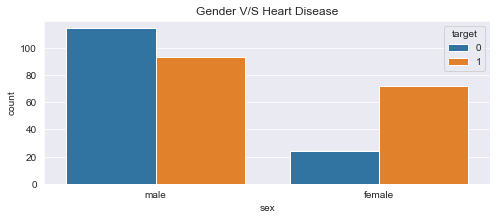

In [116]:
sns.countplot(heart['sex'],hue = heart['target'])
plt.title("Gender V/S Heart Disease")

#  let's visual the relationship between person_blood_pressure and target 

Text(0.5, 1.0, 'person_blood_pressure v/s target ')

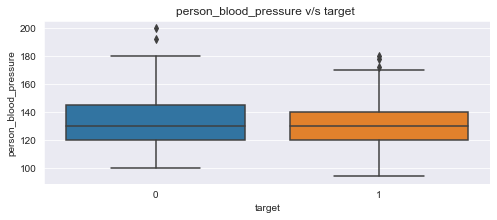

In [117]:
sns.boxplot(heart['target'],heart['person_blood_pressure'])
plt.title("person_blood_pressure v/s target ")

#  let's visual the relationship between cholestrol and target

Text(0.5, 1.0, 'cholestrol v/s target ')

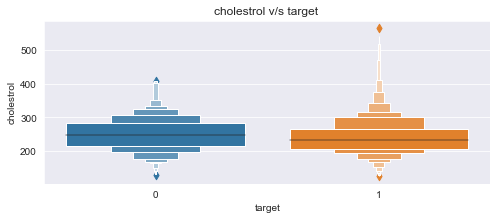

In [118]:
plt.rcParams['figure.figsize'] = (8,3)
sns.boxenplot(heart['target'],heart['cholestrol'])
plt.title("cholestrol v/s target ")

# let's visual the relationship between fasting_blood_sugar and target 

Text(0.5, 1.0, 'fasting_blood_sugar v/s target')

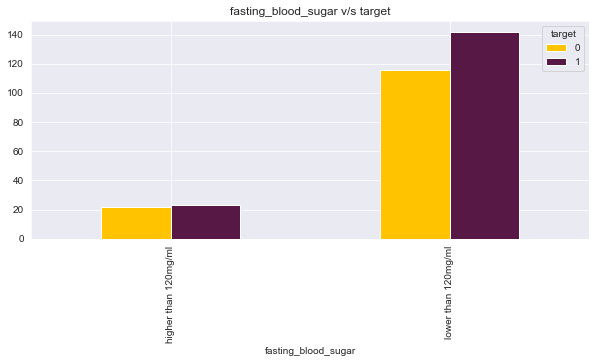

In [119]:
pd.crosstab(heart['fasting_blood_sugar'],heart['target']).plot(kind = 'bar',figsize=(10,4),color=['#FFC300','#581845'])
plt.title("fasting_blood_sugar v/s target")

Text(0.5, 1.0, 'Chest pain v/s Target')

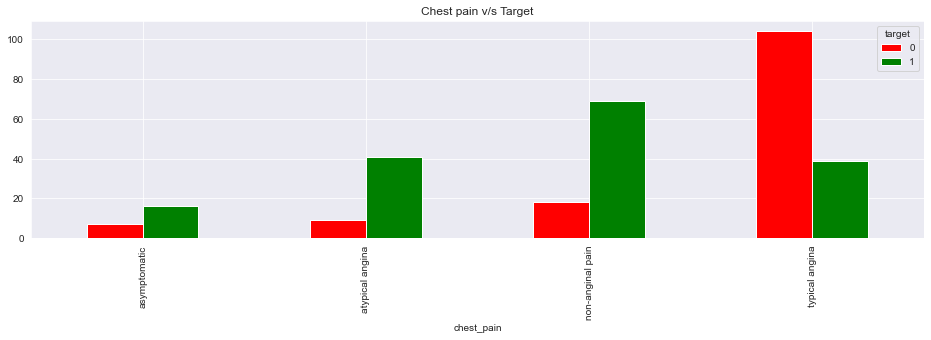

In [120]:
pd.crosstab(heart["chest_pain"],heart['target']).plot(kind = 'bar',figsize = (16,4),color = ["red","green"])
plt.title("Chest pain v/s Target")  

Text(0.5, 1.0, 'Sex v/s ChestPain')

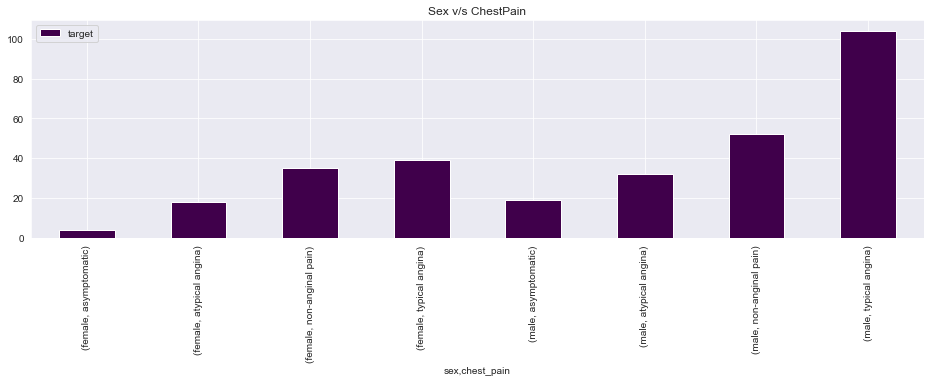

In [121]:
# From below chart now ,it's clearly confirmed that male's suffer more from heart disease than female's .
pd.pivot_table(heart,index = ["sex","chest_pain"],values = ["target"],aggfunc = "count").plot(kind = 'bar',figsize = (16,4),colormap = 'PRGn')
plt.title("Sex v/s ChestPain")

Text(0, 0.5, 'Max Heart')

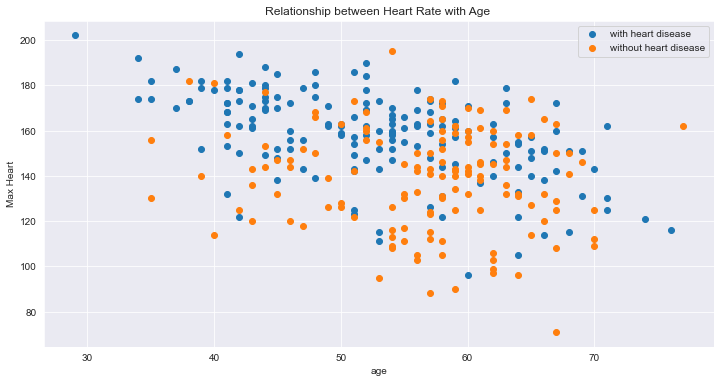

In [122]:
# Relationship between Heart v/s Age .
plt.rcParams['figure.figsize'] = (12,6)
# from below scatter we can conclude that people with heart disease has Higher Heart rate compared to the people who don't have . 
plt.scatter(x = heart.age[(heart.target == 1)] , y = heart.max_hrate[(heart.target == 1)])
plt.scatter(x = heart.age[(heart.target == 0)] , y = heart.max_hrate[(heart.target == 0)])
plt.legend([ "with heart disease","without heart disease"])
plt.title("Relationship between Heart Rate with Age ")
plt.xlabel("age")
plt.ylabel("Max Heart")

Text(0, 0.5, 'Target Frequency ')

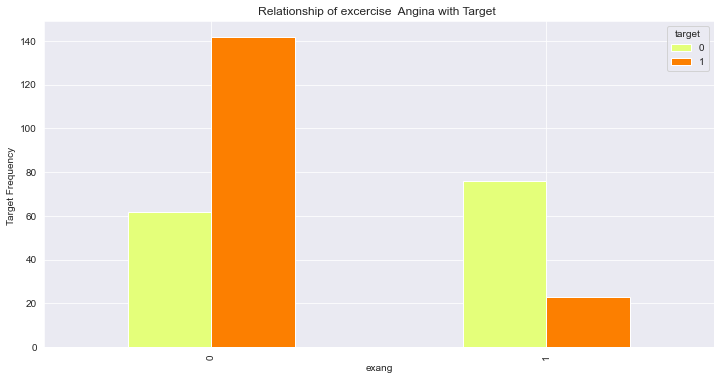

In [123]:
pd.crosstab(heart.exang,heart.target).plot(kind = 'bar',colormap = 'Wistia')
plt.title("Relationship of excercise  Angina with Target ")
plt.ylabel("Target Frequency ")

Text(0.5, 1.0, 'Blood Pressure v/s Target')

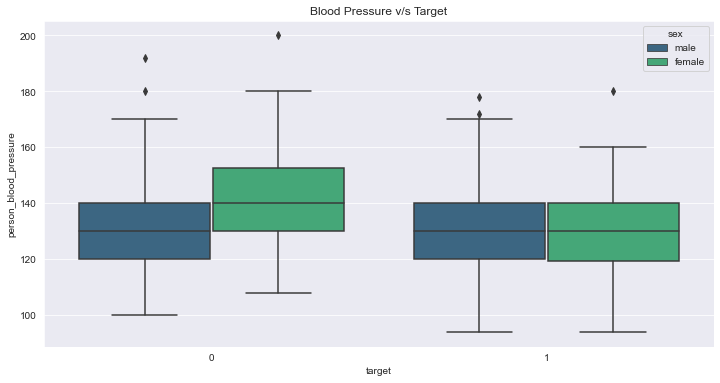

In [124]:
# From the below chart we can conclude that ,
# people with heart disease have more blood pressure compared to people who do not have .
sns.boxplot(heart["target"],heart["person_blood_pressure"],hue = heart["sex"],palette = 'viridis')
plt.title("Blood Pressure v/s Target")

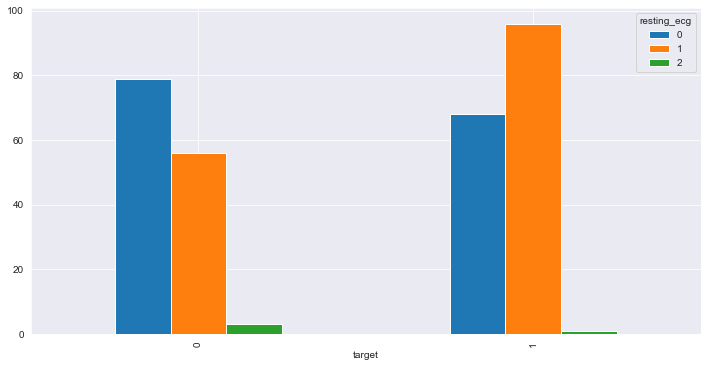

In [125]:
# From the below chart we conclude that people with or without heart disease tend to have  very less resting ecg value = 2 , 
# but people with heart disease tend to have  very high value for resting ecg = 0 
pd.crosstab(heart['target'], heart['resting_ecg']).plot(kind = 'bar')

Text(0, 0.5, 'CA Freaquency')

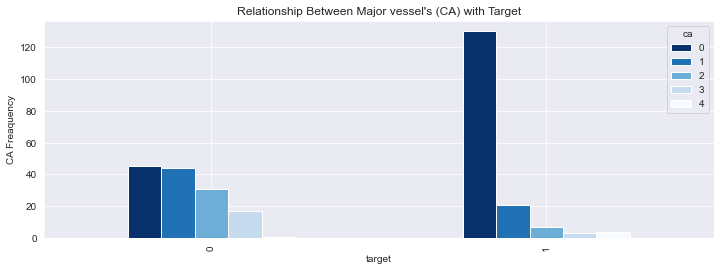

In [126]:
plt.rcParams['figure.figsize'] = (12,4)
# relationship Between Major vessel's with target
# from below chart we can conclude that poeple with heart disease have more major cell type = 0,
# compared to people who do not have heart disease . 
pd.crosstab(heart['target'],heart['ca']).plot(kind = 'bar',colormap = 'Blues_r')
plt.title("Relationship Between Major vessel's (CA) with Target")
plt.ylabel("CA Freaquency")

Text(0.5, 1.0, 'Relationship Between Slope v/s Target')

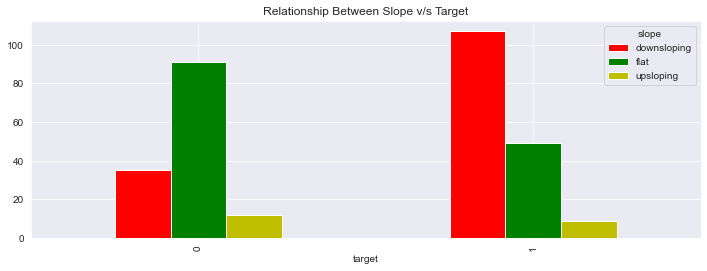

In [127]:
# Relationship Between Slope v/s Target .

# 0: Upsloping: better heart rate with excercise (uncommon)
# 1: Flatsloping: minimal change (typical healthy heart)
# 2: Downslopins: signs of unhealthy heart

# From Below chart it is clearly visible that people with heart diesease Have More value For Downsloping 
# (which indicates sign of unhealthy heart ) .

pd.crosstab(heart['target'],heart['slope']).plot(kind = 'bar',color = ['r','g','y'])
plt.title("Relationship Between Slope v/s Target")

Text(0.5, 1.0, 'Relationship Between thal (thalium stress result) with Target ')

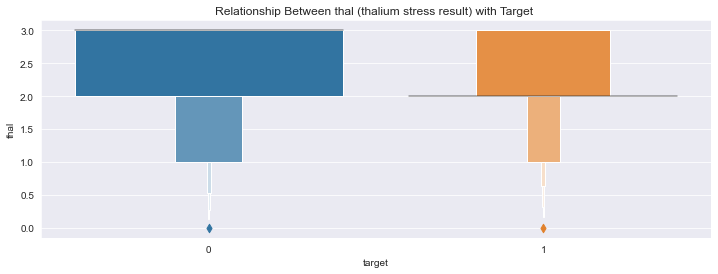

In [128]:
# Relationship Between thal (thalium stress result) with Target .
# thal :  is Blood Disorder .
# 0,1  : normal
# 2    : fixed defect: used to be defect but ok now
# 3    :  reversable defect: no proper blood movement when excercising

# it is clearly visible that People with heart disease are more likely to not suffer from this Blood disorder (Thalessemia) 
# compared with people who are not having heart disease . 

sns.boxenplot(heart['target'],heart['thal'])
plt.title("Relationship Between thal (thalium stress result) with Target ")

Text(0.5, 1.0, 'Chart Shows Correlation Among Features   : ')

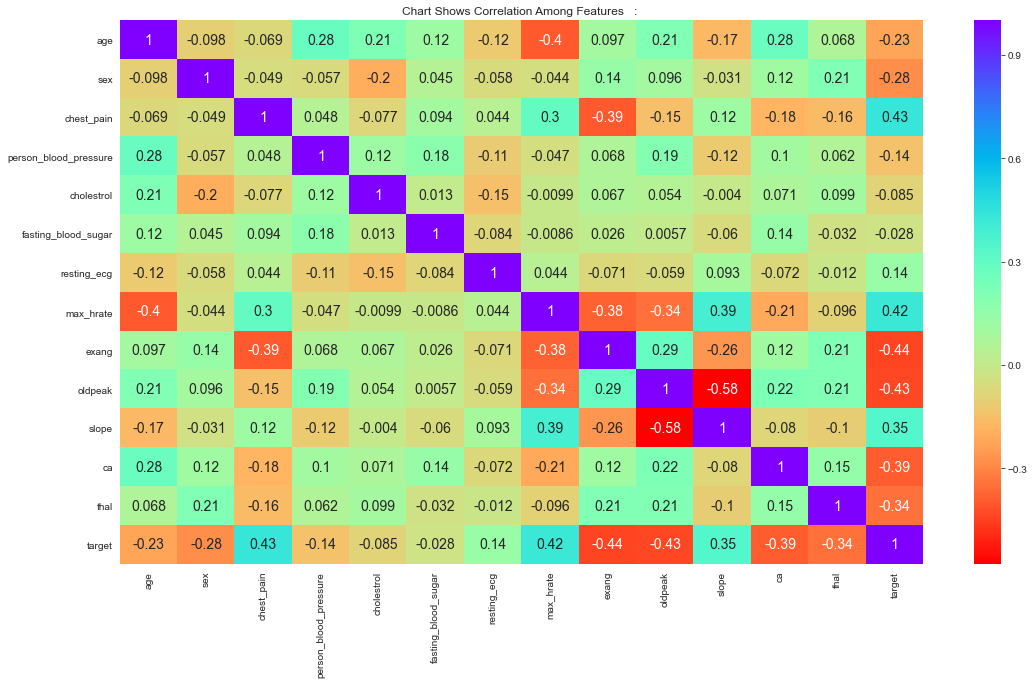

In [129]:
# Let's See The Correlation Among The Features .

# Below chart is used to visualize how one feature is correlated with every other Features Present in the dataset .
# if we have two highly correlated features then we will consider only one of them to avoid overfitting .

# since in our Dataset There is now two  features which are highly correlated ,
# hence we have consider all the features for training our Model .


plt.rcParams['figure.figsize'] = (18, 10)
sns.heatmap(df.corr(),annot = True ,cmap = 'rainbow_r',annot_kws = {"Size":14})
plt.title( "Chart Shows Correlation Among Features   : ")

In [130]:
# Converting Data Type From Int to Object .

heart['age']    = heart['age'].astype(int)
heart['resting_ecg'] = heart['resting_ecg'].astype('str')
heart['exang'] = heart['exang'].astype('str')
heart['thal']  = heart['thal'].astype('str')
heart['ca']    = heart['ca'].astype('str')

In [131]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    303 non-null    int32  
 1   sex                    303 non-null    object 
 2   chest_pain             303 non-null    object 
 3   person_blood_pressure  303 non-null    int64  
 4   cholestrol             303 non-null    int64  
 5   fasting_blood_sugar    303 non-null    object 
 6   resting_ecg            303 non-null    object 
 7   max_hrate              303 non-null    int64  
 8   exang                  303 non-null    object 
 9   oldpeak                303 non-null    float64
 10  slope                  303 non-null    object 
 11  ca                     303 non-null    object 
 12  thal                   303 non-null    object 
 13  target                 303 non-null    int64  
dtypes: float64(1), int32(1), int64(4), object(8)
memory usage:

In [132]:
# Model Building 

In [133]:
x = heart.drop(['target'],axis = 1)
y = heart.target
print(x.shape)

(303, 13)


In [134]:
x.columns

Index(['age', 'sex', 'chest_pain', 'person_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'resting_ecg', 'max_hrate', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')

In [135]:
x = pd.get_dummies(x,drop_first = True) # for converting categorical to Numerical value .
print(x.shape)

(303, 22)


In [136]:
x.columns

Index(['age', 'person_blood_pressure', 'cholestrol', 'max_hrate', 'oldpeak',
       'sex_male', 'chest_pain_atypical angina', 'chest_pain_non-anginal pain',
       'chest_pain_typical angina', 'fasting_blood_sugar_lower than 120mg/ml',
       'resting_ecg_1', 'resting_ecg_2', 'exang_1', 'slope_flat',
       'slope_upsloping', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

In [137]:
x.head() # dataset after applying get dummies function

,age,person_blood_pressure,cholestrol,max_hrate,oldpeak,sex_male,chest_pain_atypical angina,chest_pain_non-anginal pain,chest_pain_typical angina,fasting_blood_sugar_lower than 120mg/ml,...,exang_1,slope_flat,slope_upsloping,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 33)
print("Train Set Size : ",xtrain.shape)
print("Train Target Set Size : ",ytrain.shape)
print("Test  Set Size : ",xtest.shape)
print("Test  Target Set Size : ",ytest.shape)

Train Set Size :  (212, 22)
Train Target Set Size :  (212,)
Test  Set Size :  (91, 22)
Test  Target Set Size :  (91,)


In [139]:
# Applying Scaling Standardiztion to all of the features in order to bring them into common scale .
# Standardiztion : is preferred when most of the featues are not following gaussian distribution . 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = pd.DataFrame(sc.fit_transform(xtrain))
xtest  = pd.DataFrame(sc.fit_transform(xtest))

In [140]:
# Importing GridSearchCv from sklearn in order to find out the optimal Parameter for given Algorithm
# that gives best result .

from sklearn.model_selection import GridSearchCV

# Logistic Regression 

In [141]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 33 )

# Setting Parameters for Logistic Regression . 

params = {    # Regularization Params
             'penalty' : ['l1','l2','elasticnet'],
              # Lambda Value 
             'C' : [0.01,0.1,1,10,100]
         }

log_reg = GridSearchCV(lr,param_grid = params,cv = 10)
log_reg.fit(xtrain,ytrain)
log_reg.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [142]:
# Make Prediction of test data 
ypred = log_reg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        50
           1       0.73      0.90      0.80        41

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.82      0.80      0.80        91



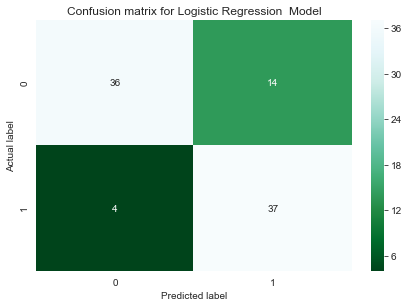

In [143]:
plt.rcParams['figure.figsize'] = (6,4)
class_names = [1,0]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred)), annot = True, cmap = 'BuGn_r',
           fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression  Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

roc_auc_score value for log reg is :  0.8112195121951219


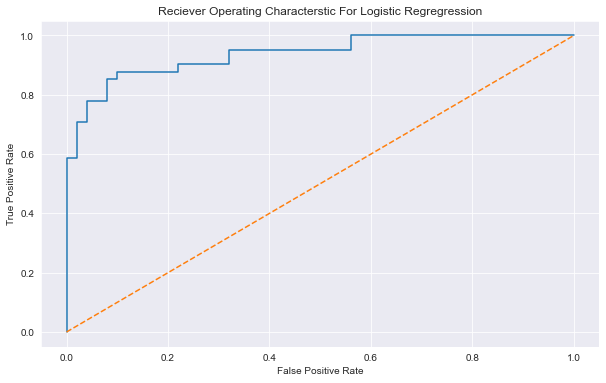

In [144]:
plt.rcParams['figure.figsize'] = (10,6)

# Get predicted probabilites from the model
y_proba = log_reg.predict_proba(xtest)[:,1]

# display auc value for log_reg
auc_log_reg = roc_auc_score(ytest,ypred)
print("roc_auc_score value for log reg is : ",roc_auc_score(ytest,ypred))

# Create true and false positive rates
fpr_log_reg,tpr_log_reg,thershold_log_reg_model = roc_curve(ytest,y_proba)
plt.plot(fpr_log_reg,tpr_log_reg)
plt.plot([0,1],ls='--')
#plt.plot([0,0],[1,0],c='.5')
#plt.plot([1,1],c='.5')
plt.title('Reciever Operating Characterstic For Logistic Regregression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Decision Tree Classifier

In [145]:
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(random_state = 33)


# Setting Parameters for DecisionTreeClassifier . 

params = {  
             'criterion'    : ["gini", "entropy"],
             'max_features' : ["auto", "sqrt", "log2"],
              'min_samples_split' :[i for i in range(4,16)],
              'min_samples_leaf' : [i for i in range(4,16)]
         }

dt_clf = GridSearchCV(dt,param_grid = params,cv = 10)
dt_clf.fit(xtrain,ytrain)
dt_clf.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 4}

In [146]:
# Make Prediction of test data 
ypred = dt_clf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        50
           1       0.64      0.90      0.75        41

    accuracy                           0.73        91
   macro avg       0.76      0.74      0.72        91
weighted avg       0.77      0.73      0.72        91



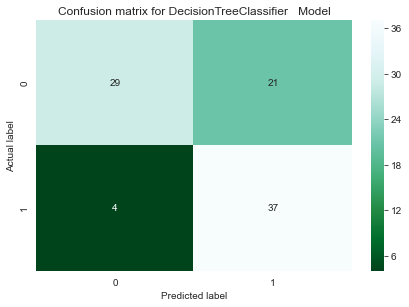

In [147]:
plt.rcParams['figure.figsize'] = (6,4)
class_names = [1,0]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred)), annot = True, cmap = 'BuGn_r',
           fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for DecisionTreeClassifier   Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

roc_auc_score value for log reg is :  0.7412195121951219


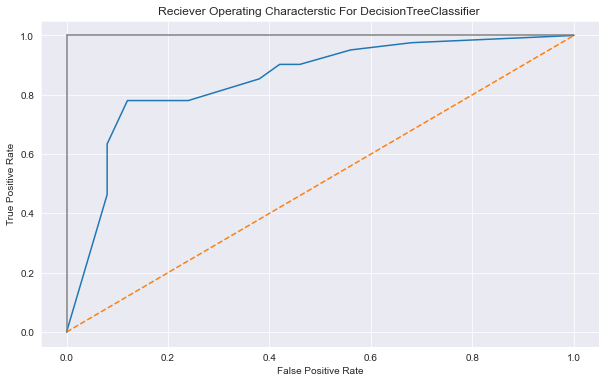

In [148]:
plt.rcParams['figure.figsize'] = (10,6)

# Get predicted probabilites from the model
y_proba = dt_clf.predict_proba(xtest)[:,1]

dt_clf_auc_score = roc_auc_score(ytest,ypred)
# display auc value for DecisionTreeClassifier
print("roc_auc_score value for log reg is : ",roc_auc_score(ytest,ypred))

# Create true and false positive rates
fpr_dt_clf,tpr_dt_clf,thershold_dt_clf_model = roc_curve(ytest,y_proba)
plt.plot(fpr_dt_clf,tpr_dt_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.title('Reciever Operating Characterstic For DecisionTreeClassifier ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# RandomForestClassifier

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 150,min_samples_split = 20,min_samples_leaf = 5,random_state = 33)
rf_clf.fit(xtrain,ytrain)
yperd = rf_clf.predict(xtest)

In [150]:
# Make Prediction of test data 
ypred = rf_clf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75        50
           1       0.67      0.95      0.79        41

    accuracy                           0.77        91
   macro avg       0.81      0.79      0.77        91
weighted avg       0.82      0.77      0.77        91



Text(0.5, 16.0, 'Predicted label')

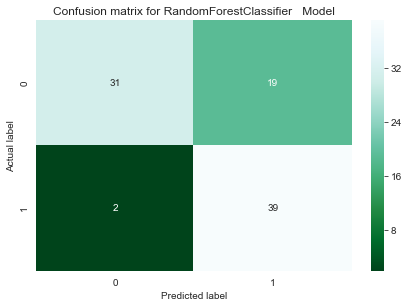

In [151]:
plt.rcParams['figure.figsize'] = (6,4)
class_names = [1,0]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred)), annot = True, cmap = 'BuGn_r',
           fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for RandomForestClassifier   Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

roc_auc_score value for log reg is :  0.785609756097561


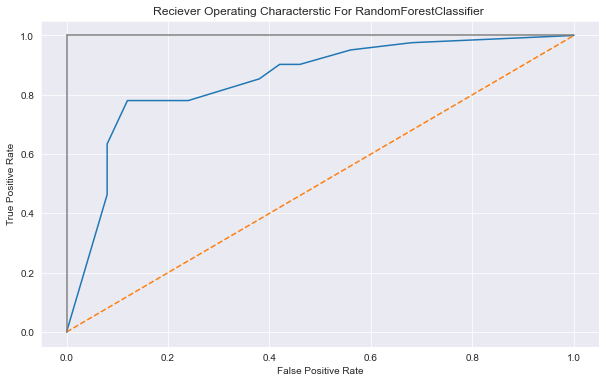

In [152]:
plt.rcParams['figure.figsize'] = (10,6)

# Get predicted probabilites from the model
y_proba = dt_clf.predict_proba(xtest)[:,1]

rf_auc_score = roc_auc_score(ytest,ypred)

# display auc value for RandomForestClassifier
print("roc_auc_score value for log reg is : ",roc_auc_score(ytest,ypred))

# Create true and false positive rates
fpr_rf_clf,tpr_rf_clf,thershold_rf_clf_model = roc_curve(ytest,y_proba)
plt.plot(fpr_rf_clf,tpr_rf_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.title('Reciever Operating Characterstic For RandomForestClassifier ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# KNN Algorithm

In [153]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs = -1)

# set params

params = {
             "n_neighbors" : [i for i in range(15)],
               'p' : [1,2] ,
              'leaf_size' : [i for i in range(15)],
               
          }
knn = GridSearchCV(knn,param_grid = params, cv = 5)
knn.fit(xtrain,ytrain)
knn.best_params_

{'leaf_size': 1, 'n_neighbors': 12, 'p': 1}

In [154]:
# Make Prediction of test data 
ypred = knn.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78        50
           1       0.70      0.93      0.80        41

    accuracy                           0.79        91
   macro avg       0.81      0.80      0.79        91
weighted avg       0.82      0.79      0.79        91



Text(0.5, 16.0, 'Predicted label')

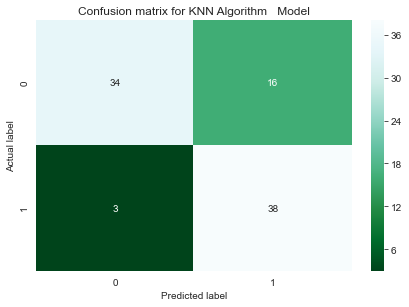

In [155]:
plt.rcParams['figure.figsize'] = (6,4)
class_names = [1,0]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred)), annot = True, cmap = 'BuGn_r',
           fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for KNN Algorithm   Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

roc_auc_score value for log reg is :  0.8034146341463414


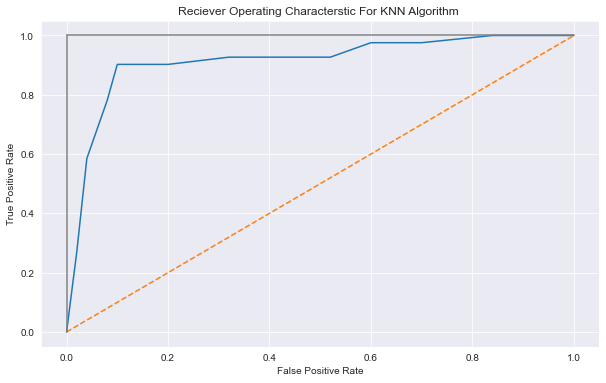

In [156]:
plt.rcParams['figure.figsize'] = (10,6)

# Get predicted probabilites from the model
y_proba = knn.predict_proba(xtest)[:,1]

knn_auc_score = roc_auc_score(ytest,ypred)


# display auc value for KNN Algorithm
print("roc_auc_score value for log reg is : ",roc_auc_score(ytest,ypred))

# Create true and false positive rates
fpr_KNN,tpr_KNN,thershold_KNN_model = roc_curve(ytest,y_proba)
plt.plot(fpr_KNN,tpr_KNN)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.title('Reciever Operating Characterstic For KNN Algorithm ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

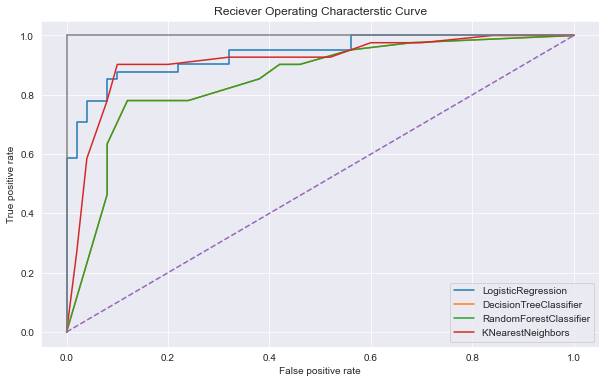

In [165]:
plt.figure(figsize=(10,6))
plt.title('Reciever Operating Characterstic Curve')
plt.plot(fpr_log_reg,tpr_log_reg,label='LogisticRegression')
plt.plot(fpr_dt_clf,tpr_dt_clf,label='DecisionTreeClassifier')
plt.plot(fpr_rf_clf,tpr_rf_clf,label='RandomForestClassifier')
plt.plot(fpr_KNN,tpr_KNN,label='KNearestNeighbors ')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()


In [166]:
print("Area Under Curve Score values for Different algorithms : ")
print("LogisticRegression          : ",auc_log_reg)
print("DecisionTreeClassfier       : ",dt_clf_auc_score)
print("RandomForest Classifier     : ",rf_auc_score)
print("KnearestNeighborsClassifier : ",knn_auc_score)

Area Under Curve Score values for Different algorithms : 
LogisticRegression          :  0.8112195121951219
DecisionTreeClassfier       :  0.7412195121951219
RandomForest Classifier     :  0.785609756097561
KnearestNeighborsClassifier :  0.8034146341463414


Thank You :) 